## Dollar Cost Averaging (DCA) in ETF Investing

In [1]:
# import relevant libraries

import pandas as pd
import numpy as np

import datetime as dt
import yfinance as yf

from dca_functions import *

import matplotlib.pyplot as plt
%matplotlib inline
# plt.style.use('fivethirtyeight')
plt.style.use('seaborn-v0_8-darkgrid')

### Section 1 - Data Fetch

In [2]:
ticker = 'XLE'

# end = dt.datetime(2023,6,15)
# start = end - dt.timedelta(1825)

end = dt.datetime(2024,7,1)
start = dt.datetime(2014,7,1)

df = data_fetch(ticker,start,end)

[*********************100%***********************]  1 of 1 completed
ETF price at the beginning of the period:	$100.16
ETF price at the end of the period:		$91.15
ETF returns over the period:			-9.0%



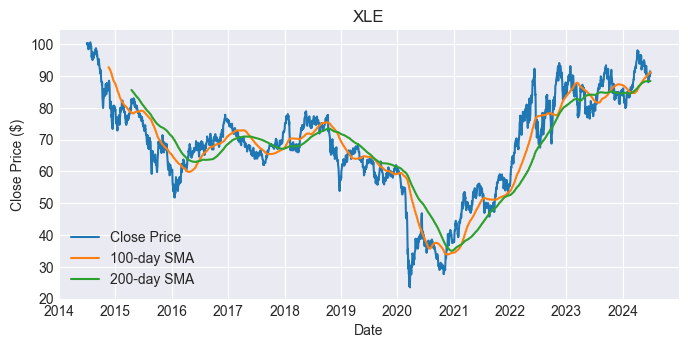

In [3]:
# visualize Close price & SMAs
fig, axs = plt.subplots(figsize=(8,3.5))
axs.plot(df['Close'],label='Close Price')
axs.plot(df['Close'].rolling(100).mean(),label='100-day SMA')
axs.plot(df['Close'].rolling(200).mean(),label='200-day SMA')
plt.xlabel('Date')
plt.ylabel('Close Price ($)')
plt.legend()
plt.title(ticker)
plt.show()

In [4]:
# set global parameters
global total_investment, deposit

# investment parameters
total_investment = 126000
deposit = 1000

### Section 2 - Buy-and-Hold
First, the buy-and-hold return is evaluated to establish a benchmark.

In [5]:
buy_n_hold_capital,buy_n_hold_gain,buy_n_hold_cumul = buy_n_hold(df,total_investment)

Investment value at the end of the period:	$114665.53
Buy-and-hold return at the end of period:	-9.0%



### Section 2 - Dollar Cost Averaging (DCA) Strategy
For the DCA strategy evaluation, it is assumed that we invest $1000 roughly once per month (every 20 trading days). Over the 10-year investment period, our monthly contributions would have grown into the following:

In [6]:
dca_capital,dca_gain,dca_cumul = dca(df,deposit,total_investment)

Total amount invested over the period:			$126000
Investment value at the end period (DCA strategy):	$179721.37
DCA strategy return at the end of period:		42.64%


### Section 3 - DCA + SMA Strategy
In this section, a modified version of the original DCA strategy is evaluated. The idea is to use a technical analysis (TA) indicator to minimize the downside - in this case, we start by using the simplest TA indicator: Simple Moving Average (SMA).

In [7]:
df3,ta_capital,ta_gain,ta_cumul,dca_ta_capital,dca_ta_gain,dca_ta_cumul = dca_ta(df,deposit,total_investment)

Total amount invested over the period:		$126000
Investment value at the end period (TA):	$133903.44
TA strategy gain at the end of period:		6.27%

Investment value at the end period (DCA + TA):	$134454.96
DCA + TA strategy gain at the end of period:	6.71%


### Section 4 - Strategy Comparison
To gain a better comparison between the strategies, the table & visualisation below were created:

In [8]:
summary = pd.DataFrame({'Strategy': ['Lump Sum','DCA','SMA','DCA + SMA'],
                    'End Equity ($)': [buy_n_hold_capital,dca_capital,ta_capital,dca_ta_capital],
                    'Returns (%)': [buy_n_hold_gain,dca_gain,ta_gain,dca_ta_gain]})
summary

,Strategy,End Equity ($),Returns (%)
0,Lump Sum,114665.53,-9.00
1,DCA,179721.37,42.64
2,SMA,133903.44,6.27
3,DCA + SMA,134454.96,6.71


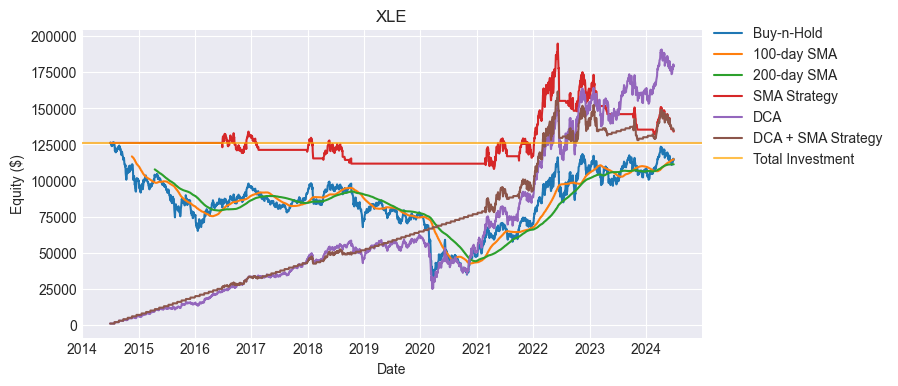

In [9]:
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(buy_n_hold_cumul, label = 'Buy-n-Hold')
ax.plot(buy_n_hold_cumul.rolling(100).mean(), label = '100-day SMA')
ax.plot(buy_n_hold_cumul.rolling(200).mean(), label = '200-day SMA')
ax.plot(ta_cumul, label = 'SMA Strategy')
ax.plot(dca_cumul, label = 'DCA')
ax.plot(dca_ta_cumul, label = 'DCA + SMA Strategy')
ax.axhline(y=total_investment, alpha=0.7, label='Total Investment', color='orange')
ax.set_ylabel('Equity ($)')
ax.set_xlabel('Date')
ax.set_title(f'{ticker}')
plt.legend(bbox_to_anchor=(1,1.05))
plt.show()